# INFO411 Lab 2 - Clustering

## Part 1

In [1]:
import numpy as np
import pylab as pl
%matplotlib inline

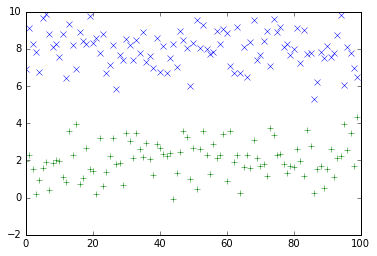

In [3]:
d1 = np.random.randn(100)+2
d2 = np.random.randn(100)+8
pl.plot(d1,'g+')
pl.plot(d2,'bx')

In [4]:
data=np.concatenate((d1,d2),axis=0)
data=np.random.permutation(data)
nrow=len(data)

In [9]:
memb1=np.random.randint(0,2,nrow) # random initialization of membership
memb2=1-memb1    # membership to Cluster 2

In [10]:
## Iterate for a number of times and see if convergence is reached. 
## c1 and c2 are the two cluster centres. 
## This updates the centres, then membership, and loops around
for it in range(20):
   c1=sum(data*memb1)/sum(memb1)
   c2=sum(data*memb2)/sum(memb2)
   # if distance to c1 is smaller it belongs to cluster 1, memb1=1; otherwise memb1=0
   memb1=np.less(np.abs(data-c1), np.abs(data-c2)).astype(int)
   memb2=1-memb1
   print c1,c2

5.09354344693 4.94019892397
7.9840369827 2.06197295004
7.9840369827 2.06197295004
7.9840369827 2.06197295004
7.9840369827 2.06197295004
7.9840369827 2.06197295004
7.9840369827 2.06197295004
7.9840369827 2.06197295004
7.9840369827 2.06197295004
7.9840369827 2.06197295004
7.9840369827 2.06197295004
7.9840369827 2.06197295004
7.9840369827 2.06197295004
7.9840369827 2.06197295004
7.9840369827 2.06197295004
7.9840369827 2.06197295004
7.9840369827 2.06197295004
7.9840369827 2.06197295004
7.9840369827 2.06197295004
7.9840369827 2.06197295004


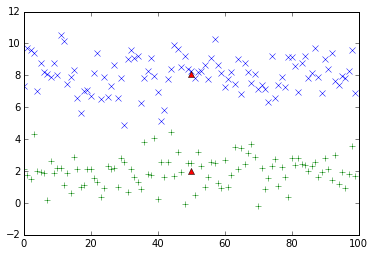

In [6]:
## Display the cluster centers
pl.plot(d1,'g+')
pl.plot(d2,'bx')
pl.plot(nrow/4,c1,'r^')
pl.plot(nrow/4,c2,'r^')

#### Q: Does the algorithm work? Comment on the results:

**Answer**: Yes it seems to work well, with new centres located around the "theoretical" values of 8.00 and 2.00.




<b>Task 1</b>. Suppose there is an outlier data point, d1[80]=200. 

In [11]:
# for simplicity just do this through "data"
data[80]=200

Repeat the experiement above and comment on the results:

After re-running the clustering process, the new centres drift upward under the influence of the outlier. There are a minor drift for the further cluster centred around "2.x", and a major drift for the closer cluster centre (from 8.0 to 10.x).

This suggests the k-means algorithm is very sensitive to outliers. 

In [12]:
memb1=np.random.randint(0,2,nrow)
memb2=1-memb1    # membership to Cluster 2
## Iterate for a number of times and see if convergence is reached. 
## c1 and c2 are the two cluster centres. 
## This updates the centres, then membership, and loops around
for it in range(20):
   c1=sum(data*memb1)/sum(memb1)
   c2=sum(data*memb2)/sum(memb2)
   # if distance to c1 is smaller it belongs to cluster 1, memb1=1; otherwise memb1=0
   memb1=np.less(np.abs(data-c1), np.abs(data-c2)).astype(int)
   memb2=1-memb1
   print c1,c2

7.3020773826 4.97064498769
10.0789038554 2.20566197865
10.0789038554 2.20566197865
10.0789038554 2.20566197865
10.0789038554 2.20566197865
10.0789038554 2.20566197865
10.0789038554 2.20566197865
10.0789038554 2.20566197865
10.0789038554 2.20566197865
10.0789038554 2.20566197865
10.0789038554 2.20566197865
10.0789038554 2.20566197865
10.0789038554 2.20566197865
10.0789038554 2.20566197865
10.0789038554 2.20566197865
10.0789038554 2.20566197865
10.0789038554 2.20566197865
10.0789038554 2.20566197865
10.0789038554 2.20566197865
10.0789038554 2.20566197865


**Task 1b**. Using the fuzzy c-means scheme (with r=2) to decide membership and repeat the experiment. 

A: The following implementation contains a small modification on how to calculate membership:

In [13]:
# fuzzy c-means 
memb1=np.random.randint(0,2,nrow)
memb2=1-memb1
offs=1e-6
## Iterate for a number of times and see if convergence is reached. 
## c1 and c2 are the two cluster centres. 
## This updates the centres, then membership, and loops around
for it in range(30):
    c1=sum(data*memb1)/sum(memb1)
    c2=sum(data*memb2)/sum(memb2)
    memb1=np.power(data-c1+offs,-2.0)/(np.power(data-c1+offs,-2.0)+np.power(data-c2+offs,-2.0))   
    memb2=1-memb1
    print c1,c2

5.01966613524 7.1885469088
4.03688678739 7.55281692556
3.51397496781 8.27170053045
3.36218691443 8.68695233453
3.39360979869 8.82762701628
3.43005180808 8.85194273076
3.44332048986 8.84827811284
3.44526381537 8.843929346
3.44465119193 8.84237885622
3.44415659696 8.84217090826
3.44400284816 8.84225204519
3.44398930921 8.84231202345
3.44400052978 8.84232990348
3.44400710978 8.84233120237
3.44400881014 8.84232977346
3.44400883495 8.84232898341
3.4440086546 8.84232878846
3.44400857055 8.84232878963
3.444008553 8.84232881212
3.44400855457 8.84232882211
3.44400855725 8.84232882409
3.44400855828 8.84232882385
3.44400855844 8.84232882352
3.4440085584 8.8423288234
3.44400855836 8.84232882338
3.44400855835 8.84232882338
3.44400855835 8.84232882339
3.44400855835 8.84232882339
3.44400855835 8.84232882339
3.44400855835 8.84232882339


**Comments:** While one might think that the "soft" version of membership in FCM may help reduce the sensitivity to outliers, in this case there seems no significant improvement on the "drifts" of cluster centres. In fact, both centres are affected by the outlier! Since the outlier is almost of the same distance to both centres, it's likely that it receives a 50% membership either way! So fuzzy is worse than crisp in this case (in the k-means version we had *just* one cluster centre drifted away due to the outlier). 

In general, FCM may help to produce better vector quantization prototypes, but as we have seen its ability to deal with outliers is certainly not guaranteed. It may be better off by just removing outliers *before* carrying out clustering. 

## Part 2

In [56]:
# Regenerate data; here d2 becomes a larger Gaussian blob
d1 = np.random.randn(100)+2
d2 = np.random.randn(100)*1.5+8
data=np.concatenate((d1,d2),axis=0)
data=np.random.permutation(data)
# followed by a simple EM implementation...

In [58]:
## Random initialization again. 
memb1=np.random.randint(0,2,nrow)
memb2=1-memb1
## now the iterations
for it in range(20):
    # update centres
    c1=sum(memb1*data)/sum(memb1)
    c2=sum(memb2*data)/sum(memb2)
    # update 'spread' - the variations
    s1=sum(memb1*(data-c1)**2)/sum(memb1)
    s2=sum(memb2*(data-c2)**2)/sum(memb2)
    # print the center and std
    print 'it=',it,':', c1,'/',np.sqrt(s1),'||',c2,'/',np.sqrt(s2)
    # re-calculate memberships using the center and std values
    memb1=np.exp(-(data-c1)**2/s1/2)
    memb2=np.exp(-(data-c2)**2/s2/2)
    # normalise
    memb1/=(memb1+memb2)
    memb2/=(memb1+memb2)

it= 0 : 5.07132945131 / 3.40340403632 || 5.19742226707 / 3.32557676227
it= 1 : 5.07787034263 / 3.37125157339 || 5.07526896263 / 3.13578108617
it= 2 : 5.15896721057 / 3.40176045343 || 4.96948255035 / 3.07977697099
it= 3 : 5.26371418412 / 3.41935612515 || 4.86383351086 / 3.04987247301
it= 4 : 5.37381356968 / 3.42745954334 || 4.75657372307 / 3.02565028406
it= 5 : 5.48464418452 / 3.4293729907 || 4.64779519422 / 3.00109236038
it= 6 : 5.59537393658 / 3.42636285627 || 4.53718349113 / 2.97402200329
it= 7 : 5.70638096775 / 3.41877484507 || 4.42380478522 / 2.94330282294
it= 8 : 5.81865637375 / 3.40648704795 || 4.30612133829 / 2.90788538269
it= 9 : 5.93366573913 / 3.3889963667 || 4.18192460388 / 2.8663767902
it= 10 : 6.05334780403 / 3.36533980674 || 4.04814173868 / 2.81669237268
it= 11 : 6.18018299107 / 3.33389663689 || 3.90047807335 / 2.75556842864
it= 12 : 6.31729552998 / 3.29203631355 || 3.73282723759 / 2.67770600084
it= 13 : 6.46849835394 / 3.23552514481 || 3.53637772558 / 2.5741444732
it= 14

In [59]:
# Another go: First round clustering - k-means, as initialization for EM
memb1=np.random.randint(0,2,nrow)
memb2=1-memb1    # membership to Cluster 2
## Iterate for a number of times and see if convergence is reached. 
## c1 and c2 are the two cluster centres. 
## This updates the centres, then membership, and loops around
for it in range(20):
   c1=sum(data*memb1)/sum(memb1)
   c2=sum(data*memb2)/sum(memb2)
   # if distance to c1 is smaller it belongs to cluster 1, memb1=1; otherwise memb1=0
   memb1=(np.sign(np.abs(data-c2)-np.abs(data-c1))+1)/2
   memb2=1-memb1
# Now 2nd round clustering: EM
for it in range(20):
    # update centres
    c1=sum(memb1*data)/sum(memb1)
    c2=sum(memb2*data)/sum(memb2)
    # update 'spread' - the variations
    s1=sum(memb1*(data-c1)**2)/sum(memb1)
    s2=sum(memb2*(data-c2)**2)/sum(memb2)
    # print the center and std
    print 'it=',it,':', c1,'/',np.sqrt(s1),'||',c2,'/',np.sqrt(s2)
    # re-calculate memberships using the center and std values
    memb1=np.exp(-(data-c1)**2/s1/2)
    memb2=np.exp(-(data-c2)**2/s2/2)
    # normalise
    memb1/=(memb1+memb2)
    memb2/=(memb1+memb2)

it= 0 : 2.15353015558 / 1.19073223277 || 8.36362537143 / 1.41576815363
it= 1 : 2.10160586529 / 1.14328680576 || 8.3782604825 / 1.41199674217
it= 2 : 2.08780684984 / 1.12715280539 || 8.36900764752 / 1.41844704752
it= 3 : 2.08102854139 / 1.11974400246 || 8.36279466939 / 1.42367122608
it= 4 : 2.07734527658 / 1.11581046509 || 8.35910911851 / 1.42688861192
it= 5 : 2.07528130397 / 1.11362653765 || 8.35696912286 / 1.42877982102
it= 6 : 2.07411027179 / 1.11239309568 || 8.35573328935 / 1.42987793157
it= 7 : 2.07344178542 / 1.1116907378 || 8.35502097917 / 1.43051263012
it= 8 : 2.07305890816 / 1.1112890284 || 8.35461078024 / 1.43087869345
it= 9 : 2.07283920353 / 1.1110587037 || 8.35437466759 / 1.43108958229
it= 10 : 2.07271299683 / 1.11092645785 || 8.35423879458 / 1.43121099925
it= 11 : 2.07264045453 / 1.11085046461 || 8.35416061658 / 1.43128087907
it= 12 : 2.07259874333 / 1.11080677586 || 8.35411563856 / 1.43132108934
it= 13 : 2.0725747549 / 1.11078165234 || 8.35408976265 / 1.43134422447
it= 14 

**Answer:** 

The EM with pure random initialization only works only *occasionally*. I may be quite unlucky, but most of times the two clusters were heavily overlapped (close centres, large spreads).

EM using k-means for a pre-run, however, turns out to be much helpful. Note not only the centres are quite accurately estimated, but also their relevant spreads (1.1 for 1.0, and 1.4 for 1.5). 

## Part 3

Nothing to report. 

## Part 4

### DBSCAN

In [2]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [3]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)
X = StandardScaler().fit_transform(X)

In [4]:
db = DBSCAN(eps=0.27, min_samples=10).fit(X)
labels = db.labels_
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

In [5]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 3


### Visualization

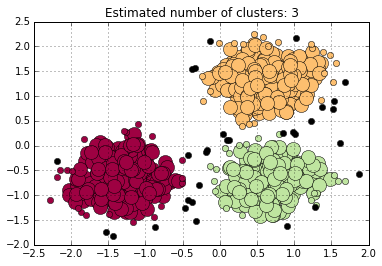

In [6]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # plot core points 
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    # non-core points
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.grid('on')

### Evaluation

For a data point with a cluster, its Silhouette Coefficient is decided by two scores:
- a: The mean distance between a sample and all other points in the same cluster.
- b: The mean distance between a sample and all other points in the next nearest cluster.
The Silhouette Coefficient $s$ for the data point is then given as:
$s = \displaystyle\frac{b - a}{max(a, b)}$

In [65]:
metrics.silhouette_score(X, labels, metric='euclidean')

0.60676527169716843

The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.

**Task B**. Parameters play important part in clustering algorithms. How does the setting of Eps affect the clustering outcome? Print out the number of clusters found, and the Silhouette Score when eps takes value from this list: [0.1,0.15,0.2,0.25,0.3,0.35,0.4].

In [66]:
for eps in [0.1,0.15,0.2,0.25,0.3,0.35,0.4]:
    db = DBSCAN(eps, min_samples=10).fit(X)
    labels = db.labels_
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = Truelabels = db.labels_
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print ('Eps.=%f' %eps),
    print('N_clusters: %2d' % n_clusters_),
    print('SS=%f' % metrics.silhouette_score(X, labels, metric='euclidean'))

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: assignment will raise an error in the future, most likely because your index result shape does not match the value array shape. You can use `arr.flat[index] = values` to keep the old behaviour.


Eps.=0.100000 N_clusters: 12 SS=-0.365853
Eps.=0.150000 N_clusters:  4 SS=0.249893
Eps.=0.200000 N_clusters:  3 SS=0.542612
Eps.=0.250000 N_clusters:  3 SS=0.601847
Eps.=0.300000 N_clusters:  3 SS=0.625525
Eps.=0.350000 N_clusters:  2 SS=0.421073
Eps.=0.400000 N_clusters:  1 SS=0.061095


**Comment on your findings: **

When the Eps value increases within the given range, it is easy to see some clear trends: the number of clusters drops (sure, as bigger Eps tends to include more points for a core, so clusters grow bigger, and become less), and the silouette score climbs up but then quickly goes down, reflecting the change on clusters' compactness. 
I tried a number of values of min_samples, from 5 to 14, the outcome is quite consistent: 3 clusters always give the highest score. Outside this range I haven't been so lucky.

This raises the question: Given a dataset, how can we find the right values for these parameters - Eps and min_samples? I haven't seen any good sources on this, but my feeling is having some visual inspection of the pair-wise distance histogram may help. If there are two peaks on the distance histogram, these may indicate roughly the distance range between points in proximity, and between points between clusters, and an Eps set between the two peaks may be useful. I hope this (partially) answers one of our review questions for the Clustering Lecture :-)  

I leave some empirical evidence here as food for thoughts. 

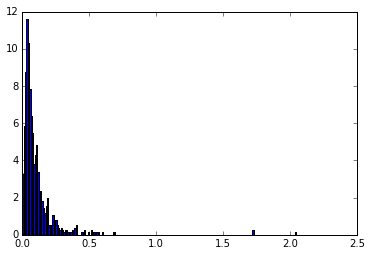

In [25]:
## Generate stats about the nearest-neighbour distances
distlist=[]
n=len(X)
for i in range(n):
    dist=[]
    for j in range(i+1,n):
        dist.append(np.linalg.norm(X[i,:]-X[j,:]))
    if len(dist)>0: mindist=min(dist)
    distlist.append(mindist)
hist,bins,patch=pl.hist(distlist,bins=200,normed=True)

In [29]:
# take a look of the first few histogram elements and look for valleys
hist[:50]

array([  3.26139076,   5.87050337,   8.74052725,  11.61055112,
        10.30599481,   7.82733783,   6.3923259 ,   5.47913648,
         3.78321329,   4.30503581,   4.82685833,   3.39184639,
         1.6959232 ,   2.34820135,   1.82637883,   1.43501194,
         1.17410067,   1.56546757,   1.95683446,   0.52182252,
         0.52182252,   0.39136689,   1.04364504,   0.52182252,
         0.78273378,   0.52182252,   0.39136689,   0.26091126,
         0.39136689,   0.26091126,   0.13045563,   0.26091126,
         0.26091126,   0.13045563,   0.        ,   0.13045563,
         0.26091126,   0.26091126,   0.39136689,   0.52182252,
         0.        ,   0.        ,   0.        ,   0.13045563,
         0.13045563,   0.26091126,   0.        ,   0.        ,
         0.13045563,   0.        ])

In [31]:
# there seems to be a big drop from 1.95 to 0.52, at bin number 19. Let's check out the corresponding distance value:
bins[19]

0.19598439477118665

In [32]:
# What is the probablity of having a NN distance smaller than the chosen distance value?
np.cumsum(hist)[19]

88.318461875471371

What's shown above is that at the distance threshold 0.1960, we can include 88% of NN pairwise distances. This might indicate that the DBSCAN setting of Eps=0.2 is a reasonable choice. 

**Task C**. Use the Sklearn K-means function to redo the clustering with k=2, 3, 4, 5. Report the Silhouette Scores.  

In [69]:
# My code
from sklearn.cluster import KMeans
for k in range(2,11):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=1).fit(X)
    labels=kmeans.labels_
    print 'k:',k,'\tSil. Score:', metrics.silhouette_score(X, labels, metric='euclidean')

 k: 2 	Sil. Score: 0.518251961809
k: 3 	Sil. Score: 0.649607545502
k: 4 	Sil. Score: 0.53709763673
k: 5 	Sil. Score: 0.404207731708
k: 6 	Sil. Score: 0.433722415071
k: 7 	Sil. Score: 0.334144539654
k: 8 	Sil. Score: 0.342984598906
k: 9 	Sil. Score: 0.34661078942
k: 10 	Sil. Score: 0.346431237739


**Comment on your findings:**

When k (number of clusters specified for k-means) increases from 2 to 10 (yes I tried a bigger range) it is interesting to see that the Silhouette Coefficient quickly climbs to the top (0.650 with k=3), then drops. Note it is not a steady trend but with small fluctuations (k=6, and 9). The best score goes to k=3, which is consistent with the DBSCAN result, and how we generated the data in the first place!

By default n_init is set to 10, and K-Means picks the best from 10 initializations. Here, note that I use k-means++ for initialization and set the n_init to 1, and the results have been quite good!

Here goes the call for volunteers who would like to take the k-means papers (k-means++, mini batch etc.) for presentation :-)

END OF LAB 2.

**COMMENTS: **
Over all, very well done to all. 

It's encouraging to see many attempted the fuzzy c-means, with success. Best track records so far for INFO411.  

Apart from k-means, FCM, and density-based algorithms such as DBSCAN, there's another important class of clustering algorithms - Spectral Clustering. The best thing about it is that it doesn't mandate any distance metrics (in the sense that k-means assumes Euclidean, and k-medoids implies Manhatten distance). Rather, one can use customly designed distance or similarity measures and plug it in for the algorithm to work (on eigenanalysis of the dissimilarity matrix rather than the data points directly - hence the word "spectral"). For more information, please refer to these Sklearn pages:

- http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html
- http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#example-cluster-plot-cluster-comparison-py
